# Titanic Survivor Classification

## Description
This is notebook to build classification for Titanic passengers to classify if those passengers survived or not. Our aim is to get model with the most accuracy possible.

source : https://www.kaggle.com/competitions/titanic/data

## Data Overview

In [1]:
import pandas as pd
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

So, here is Describe for each column
- PassengerId : id for each passenger for this data
- Survived : if this passenger survived or not (0 = No, 1 = Yes)
- Pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name : name of passenger
- Sex : sex of passenger
- Age : age of passenger
- SibSp : number of siblings / spouses aboard the Titanic
- Parch : number of parents / children aboard the Titanic
- Ticket : Ticket number
- Fare : Passenger fare
- Cabin : Cabin number
- Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Clean Up
Remove column that we are not going to use and fill null data.

In [5]:
# remove cloumns PassengerId, Name, Ticket and Cabin Since it have high cardinality.
data = data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [6]:
# get mean age
mean_age = data['Age'].mean()

print('mean age = ', mean_age)

# show histogram for Embarked for impute with the most frequent value
mode_emb = data['Embarked'].mode()
print('mode Embarked = ', mode_emb[0])

mean age =  29.69911764705882
mode Embarked =  S


In [7]:
# impute missing data
values = {'Age' : mean_age, 'Embarked': 'S'}
data = data.fillna(value=values)

In [8]:
# convert Sex to int and Embarked to 3 int columns
data['Sex'] = data.Sex.apply(lambda x: int(x =='male'))
data['Emb_C'] = data.Embarked.apply(lambda x: int(x =='C'))
data['Emb_Q'] = data.Embarked.apply(lambda x: int(x =='Q'))
data['Emb_S'] = data.Embarked.apply(lambda x: int(x =='S'))

data = data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Emb_C', 'Emb_Q', 'Emb_S']]
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Visual Display

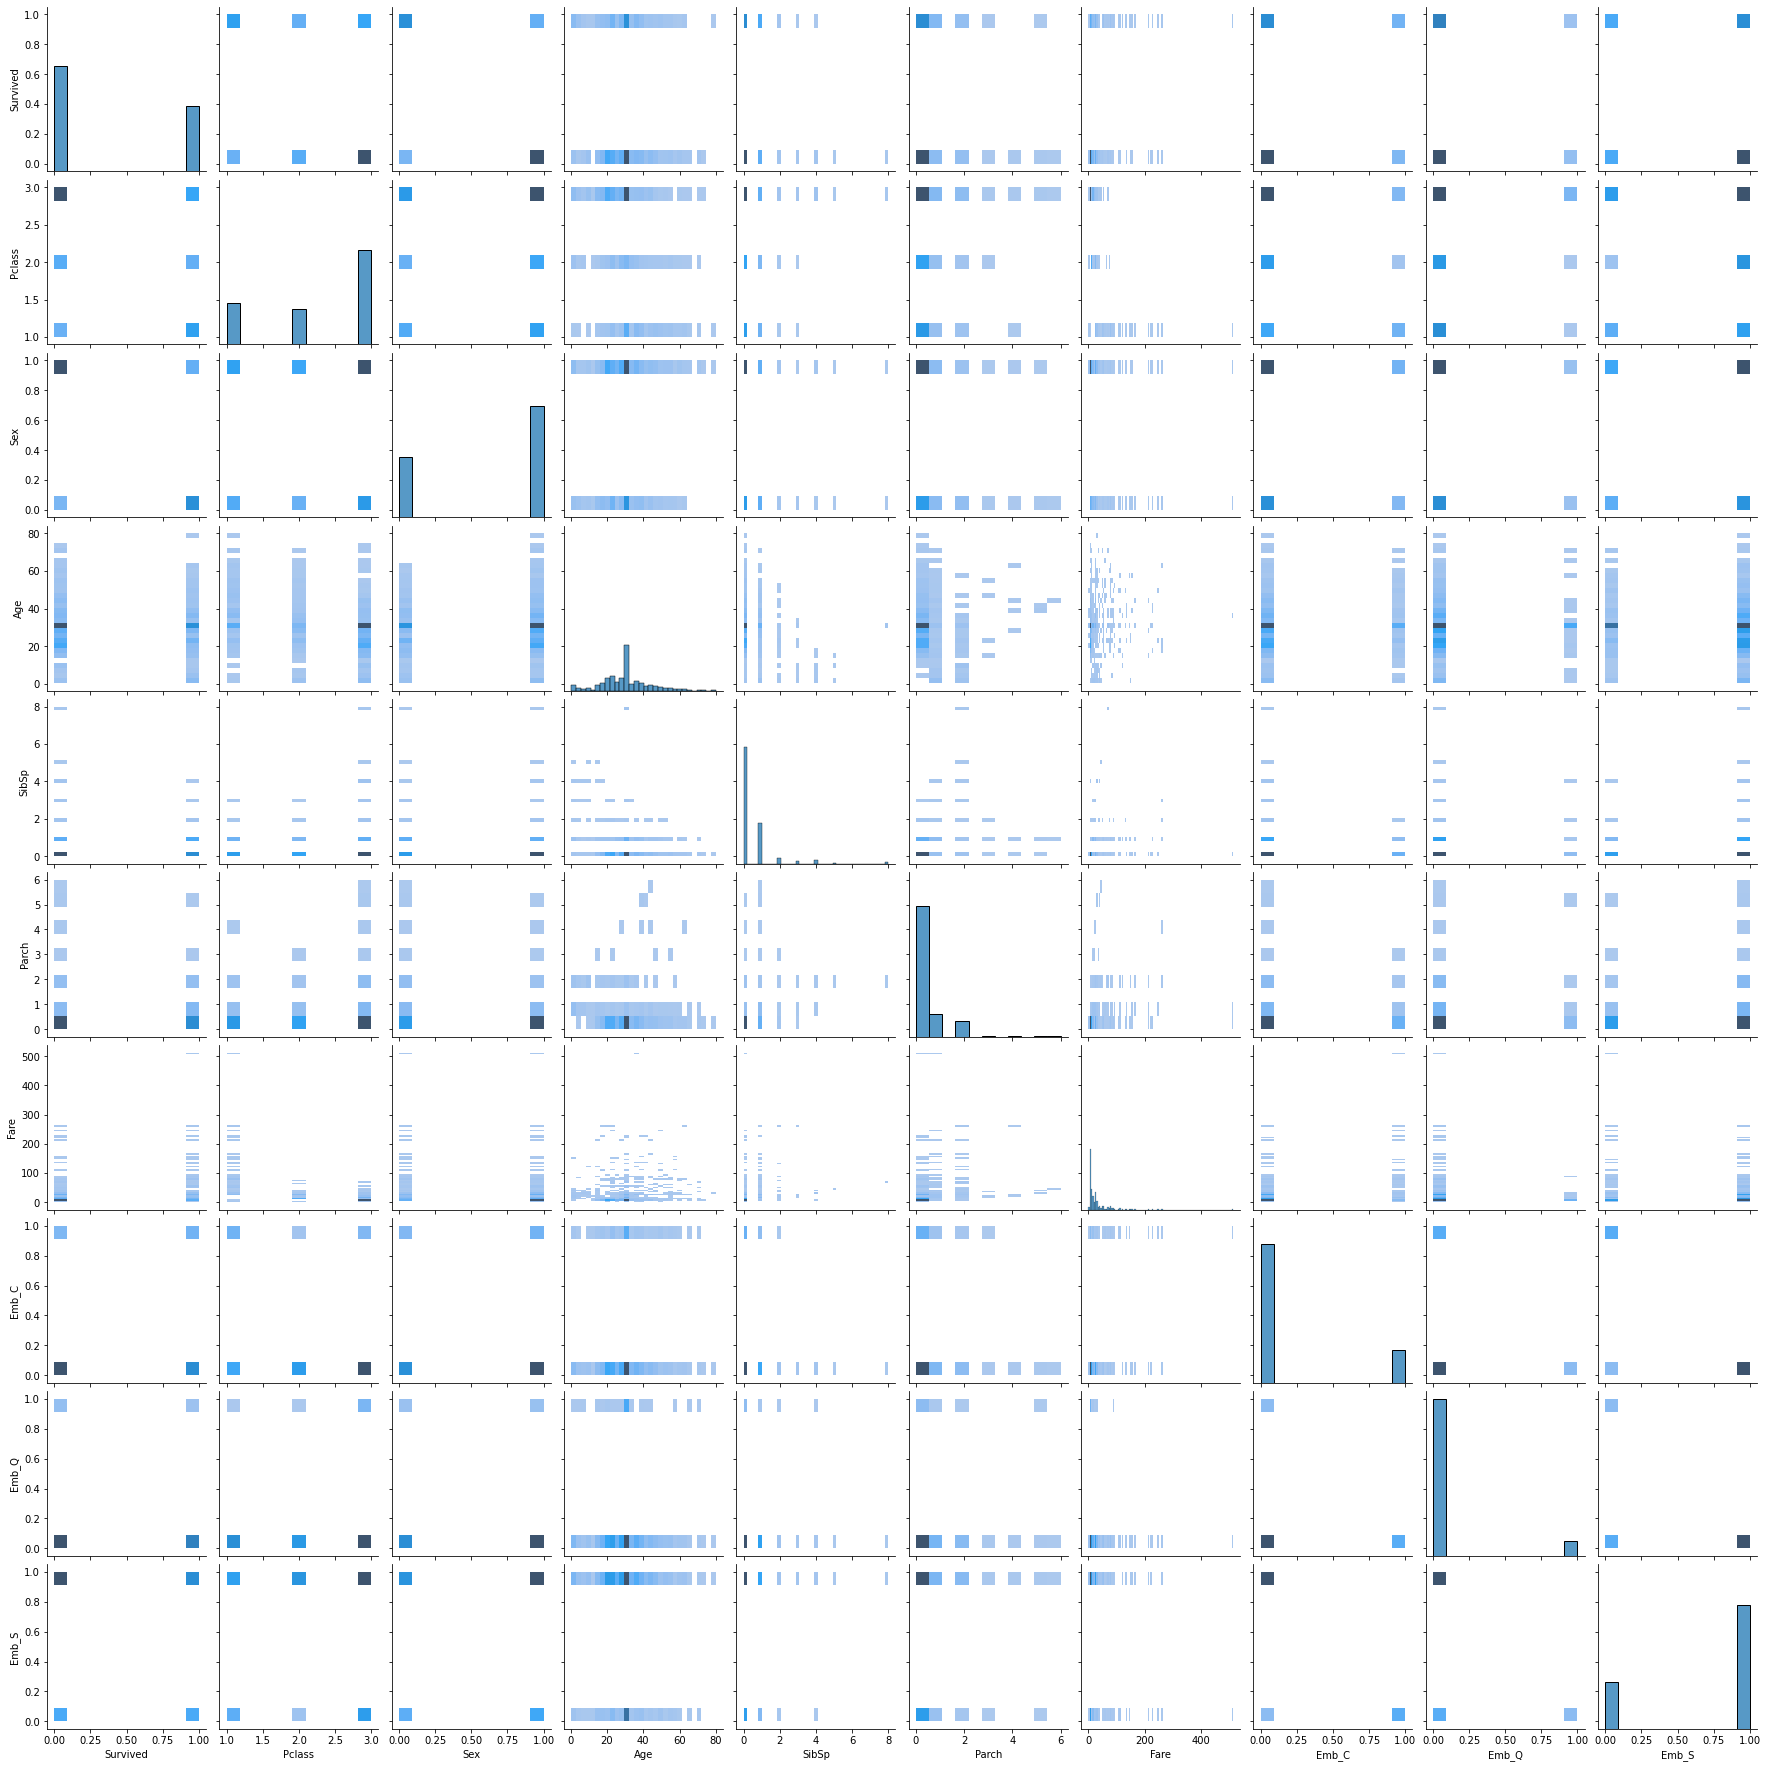

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, kind="hist")
plt.savefig('pair_plot1.png')

In [10]:
corr_data = data.corr()
print(corr_data)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.331339  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.084153 -0.114631 -0.245489   
Age      -0.069809 -0.331339  0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081 -0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.091566  0.159651  0.216225   
Emb_C     0.168240 -0.243292 -0.082853  0.032024 -0.059528 -0.011069   
Emb_Q     0.003650  0.221009 -0.074115 -0.013855 -0.026354 -0.081228   
Emb_S    -0.149683  0.074053  0.119224 -0.019336  0.068734  0.060814   

              Fare     Emb_C     Emb_Q     Emb_S  
Survived  0.257307  0.168240  0.003650 -0.149683  
Pclass   -0.549500 -0.243292  0.221009  0.074053  
Sex      -0.182333 -0.082853 -0.074115  0.119224  
Age

<AxesSubplot:>

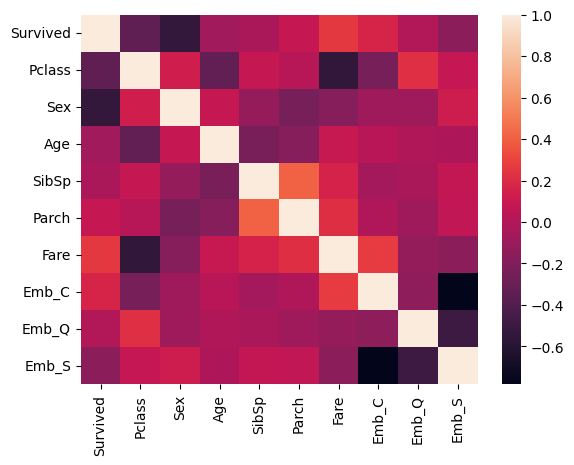

In [11]:
sns.heatmap(corr_data)

Age         AxesSubplot(0.125,0.11;0.168478x0.77)
SibSp    AxesSubplot(0.327174,0.11;0.168478x0.77)
Parch    AxesSubplot(0.529348,0.11;0.168478x0.77)
Fare     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

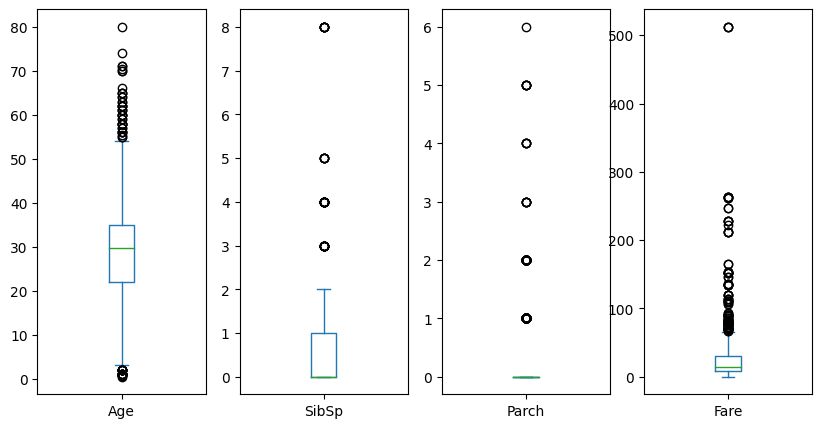

In [12]:
plot_data = data[['Age','SibSp','Parch','Fare']]
plot_data.plot(kind="box", subplots=True, figsize =(10, 5))

### Analysis
From information above, seems there is no strong correlation between features as you and see from correlation heatmap or raw data (>0.7). You may see Emb_C and Emb_S have high value but those columns was extracted from Embarked feature. There are lot of outiler data as you can see. But, I think those are all valid. Age are in reasonable range (more than 0 and less than 90). SibSp and Parch also resonable because most of people board alone. Fare also reasonbale for me.

## Classification
I want to use Random Forest Tree to solve this problem. Because we have only fews features.

First, split data in to train and test (test for 20%).

In [23]:
from sklearn.model_selection import train_test_split

X = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Emb_C', 'Emb_Q', 'Emb_S']]
Y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1992)

print(len(x_train), len(x_test))

712 179


Then, Build first model to be our base line.

In [24]:
from sklearn.ensemble import RandomForestClassifier

bl_model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1992).fit(x_train, y_train)
print('score with training data = ',bl_model.score(x_train,y_train))
print('score with test data = ',bl_model.score(x_test,y_test))

score with training data =  0.8539325842696629
score with test data =  0.7653631284916201


try to play with n_estimators and max_depth

train_scores =  [0.8539325842696629, 0.8609550561797753, 0.8651685393258427, 0.8679775280898876, 0.8567415730337079, 0.8567415730337079, 0.8567415730337079, 0.8567415730337079, 0.8553370786516854, 0.8553370786516854]
test_scores =  [0.7653631284916201, 0.7821229050279329, 0.7932960893854749, 0.7932960893854749, 0.7988826815642458, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877]


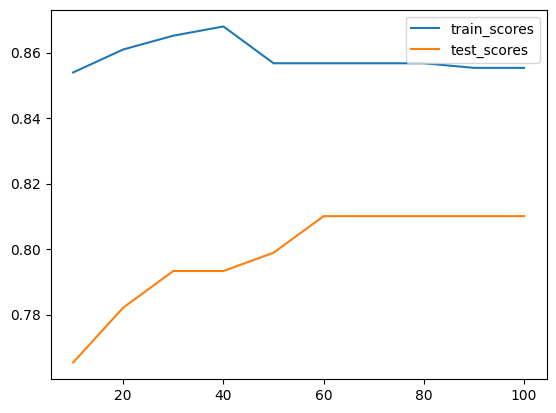

In [25]:
es = list(range(10,110,10))
train_scores = []
test_scores = []
for e in es:
    model = RandomForestClassifier(n_estimators=e, max_depth=5, random_state=1992).fit(x_train, y_train)
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))
    
print('train_scores = ', train_scores)
print('test_scores = ', test_scores)

plt.plot(es, train_scores)
plt.plot(es, test_scores)

plt.legend(['train_scores', 'test_scores'])
plt.show()

Try with max_depth=10

train_scores =  [0.9424157303370787, 0.9466292134831461, 0.9480337078651685, 0.9508426966292135, 0.949438202247191, 0.952247191011236, 0.9550561797752809, 0.9536516853932584, 0.949438202247191, 0.9508426966292135]
test_scores =  [0.7932960893854749, 0.8100558659217877, 0.8156424581005587, 0.8156424581005587, 0.8268156424581006, 0.8212290502793296, 0.8324022346368715, 0.8324022346368715, 0.8268156424581006, 0.8324022346368715]


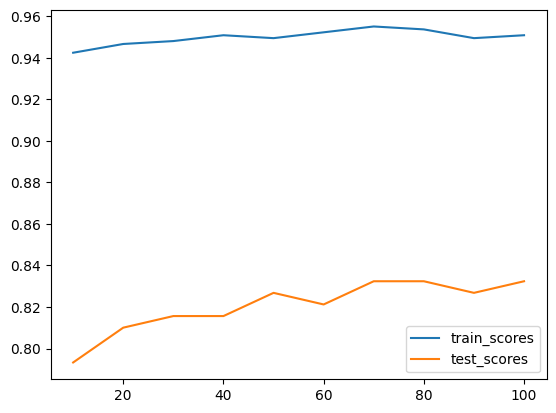

In [28]:
es = list(range(10,110,10))
train_scores = []
test_scores = []
for e in es:
    model = RandomForestClassifier(n_estimators=e, max_depth=10, random_state=1992).fit(x_train, y_train)
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))
    
print('train_scores = ', train_scores)
print('test_scores = ', test_scores)

plt.plot(es, train_scores)
plt.plot(es, test_scores)

plt.legend(['train_scores', 'test_scores'])
plt.show()

From graphs we can see that using max_depth=10 is better. And the reasonal n_estimators is 50.

I will try to tune ccp_alpha to reduce data overfitted.

train_scores =  [0.949438202247191, 0.8595505617977528, 0.8356741573033708, 0.8146067415730337, 0.8188202247191011, 0.7921348314606742, 0.7879213483146067, 0.7879213483146067, 0.7879213483146067, 0.7879213483146067]
test_scores =  [0.8268156424581006, 0.7988826815642458, 0.7988826815642458, 0.7877094972067039, 0.770949720670391, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329, 0.7821229050279329]


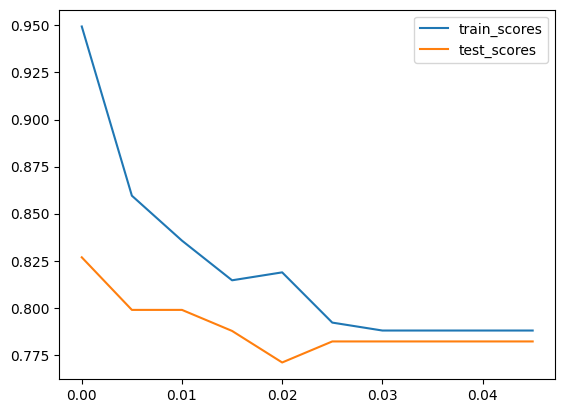

In [29]:
alphas = []
for i in range(10):
    alphas.append(i*0.005)

train_scores = []
test_scores = []
for a in alphas:
    model = RandomForestClassifier(n_estimators=50, max_depth=10, ccp_alpha=a, random_state=1992).fit(x_train, y_train)
    train_scores.append(model.score(x_train,y_train))
    test_scores.append(model.score(x_test,y_test))
    
print('train_scores = ', train_scores)
print('test_scores = ', test_scores)

plt.plot(alphas, train_scores)
plt.plot(alphas, test_scores)

plt.legend(['train_scores', 'test_scores'])
plt.show()

Incrase ccp_alpha helps reduce over fitted problem. But, I don't want to sacrifice score fro this.

So, the best model for me is n_estimators=50, max_depth=10 and ccp_alpha=0

In [36]:
best_model = RandomForestClassifier(n_estimators=50, max_depth=10, ccp_alpha=0, random_state=1992).fit(x_train, y_train)
print('score with training data = ',bl_model.score(x_train,y_train))
print('score with test data = ',bl_model.score(x_test,y_test))

score with training data =  0.8539325842696629
score with test data =  0.7653631284916201


Use this setting and train with all data we have to predict test data from Kaggle.

In [31]:
best_model = RandomForestClassifier(n_estimators=50, max_depth=10, ccp_alpha=0, random_state=1992).fit(X, Y)
print('score with training data = ',bl_model.score(X,Y))

score with training data =  0.8361391694725028


In [32]:
org_test_data = pd.read_csv('test.csv')
test_data = org_test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

mean_fare = data['Fare'].mean()

values = {'Age' : mean_age, 'Fare': mean_fare, 'Embarked': 'S'}
test_data = test_data.fillna(value=values)

In [33]:
test_data['Sex'] = test_data.Sex.apply(lambda x: int(x =='male'))
test_data['Emb_C'] = test_data.Embarked.apply(lambda x: int(x =='C'))
test_data['Emb_Q'] = test_data.Embarked.apply(lambda x: int(x =='Q'))
test_data['Emb_S'] = test_data.Embarked.apply(lambda x: int(x =='S'))

test_data = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Emb_C', 'Emb_Q', 'Emb_S']]

In [34]:
predictions = best_model.predict(test_data)
output = pd.DataFrame({'PassengerId': org_test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Score for submit this prediction to Kaggle = 0.77751

## Conclusion
For this problem first we look at overview of data we have. Then, we clean it up (select only useful feature fill null data). After that we do analysis about corrlation and outlier. And, we build classification model with random forest tree and tune it to get the best model. Last, we use our best model to do prediction and submit it to Kaggle.

Actually, I also try Adaboost but it worst than this. But I still think that there are better approch to this problem which I havn't try it.

github : https://github.com/Satjarporn/Titanic